In [75]:
import numpy as np
import cv2
from skimage import io
import os
import matplotlib.pyplot as plt

def delete_old_image(output_path, filename):
    # Construct the old image file path
    old_image_path = os.path.join(output_path, filename[:-4] + '.tif')
    # Check if the old image file exists
    if os.path.exists(old_image_path):
        # Delete the old image file
        os.remove(old_image_path)

def conversion(folder_path, output_path,masks = False):
    # Set the file path

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Read all the masks in the .npy masks from folder_path
    for filename in os.listdir(folder_path):
        # Ensure the file is a .npy file
        if filename.endswith('.npy'):
            # Delete old image if it exists
            delete_old_image(output_path, filename)
            # Load the image from .npy file
            img = np.load(os.path.join(folder_path, filename))
            # Save the new image as .tif
            if masks:
                img = (img * 255).astype(np.uint8)
            io.imsave(os.path.join(output_path, filename[:-4] + '.tif'), img)


In [95]:
import os

def delete_npy_files(directory):
    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        # Check if the file is a .npy file
        if filename.endswith('.npy'):
            # Construct the file path
            file_path = os.path.join(directory, filename)
            # Delete the file
            os.remove(file_path)
            print(f"Deleted {file_path}")

    
folder_path = 'UMNData/val/images'

conversion(folder_path, folder_path, masks=False)
delete_npy_files(folder_path)


Deleted UMNData/val/images/22_05.npy
Deleted UMNData/val/images/22_13.npy
Deleted UMNData/val/images/19_03.npy
Deleted UMNData/val/images/20_14.npy
Deleted UMNData/val/images/21_07.npy
Deleted UMNData/val/images/23_04.npy
Deleted UMNData/val/images/23_20.npy
Deleted UMNData/val/images/21_15.npy
Deleted UMNData/val/images/22_18.npy
Deleted UMNData/val/images/21_16.npy
Deleted UMNData/val/images/20_16.npy
Deleted UMNData/val/images/21_08.npy
Deleted UMNData/val/images/22_01.npy
Deleted UMNData/val/images/21_09.npy
Deleted UMNData/val/images/19_23.npy
Deleted UMNData/val/images/22_23.npy
Deleted UMNData/val/images/19_04.npy
Deleted UMNData/val/images/20_10.npy
Deleted UMNData/val/images/23_10.npy
Deleted UMNData/val/images/19_05.npy
Deleted UMNData/val/images/23_24.npy
Deleted UMNData/val/images/19_09.npy
Deleted UMNData/val/images/19_16.npy
Deleted UMNData/val/images/19_14.npy
Deleted UMNData/val/images/19_21.npy
Deleted UMNData/val/images/22_21.npy
Deleted UMNData/val/images/22_09.npy
D

In [98]:
# loop over the images in 128_patches/images
from PIL import Image
from skimage import io
import os
directory = "UMNData/val/masks/"
for filename in os.listdir(directory):
    img = io.imread(os.path.join(directory, filename))
    #print(img.shape)

    # Convert the NumPy array to an Image object
    img = Image.fromarray(img)
    #convert to grayscale
    img = img.convert('L')
    #img=img.convert("RGB")
    img = img.resize((224, 224))

    # Save the converted image to a file
    img.save(os.path.join(directory, filename))

(224, 224) (224, 224)
(224, 224) (224, 224)
(224, 224) (224, 224)


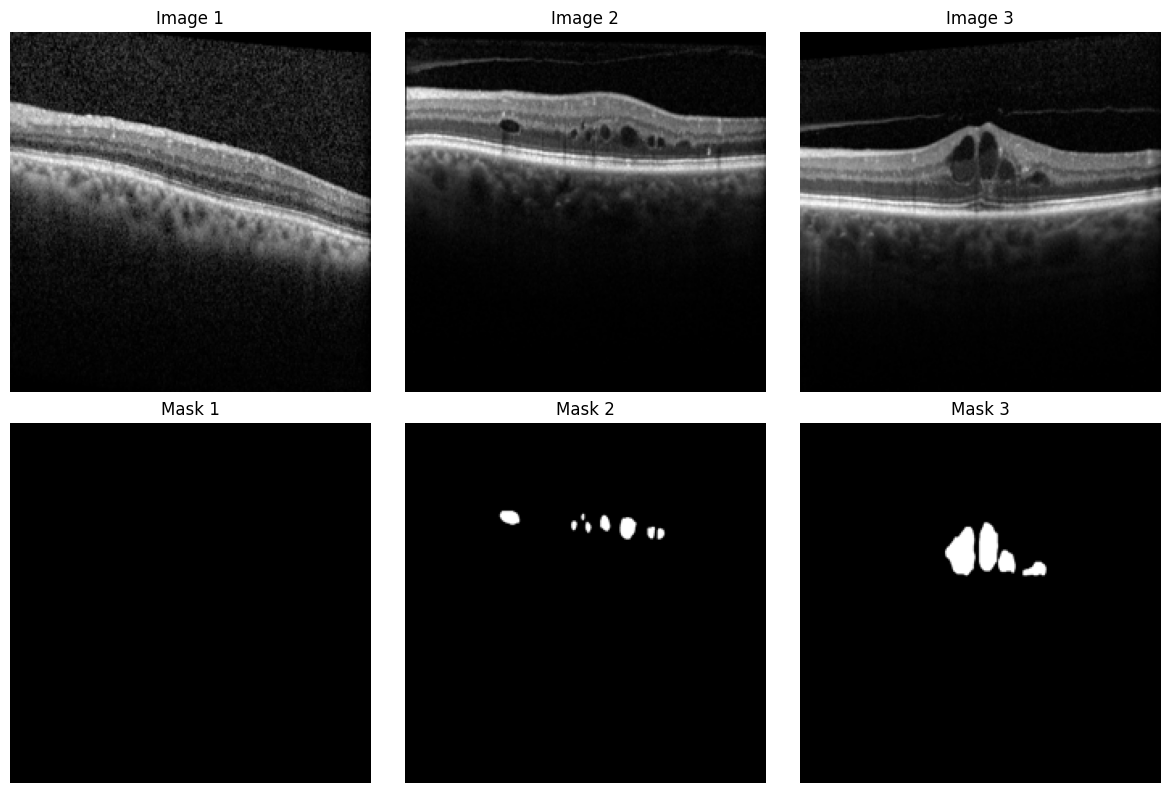

In [99]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import torch
import numpy as np  # You need to import numpy to use np.array

root_dir = 'UMNData'
images_dir = os.path.join(root_dir, 'val', 'images')  # Update this to your noisy crops path
masks_dir = os.path.join(root_dir, 'val', 'masks')  # Update this to your masks path

# List all .tif files in the images directory
image_files = [f for f in os.listdir(images_dir) if f.endswith('.tif')]

# Randomly select 3 images and masks
selected_files = random.sample(image_files, 3)

# Create a 2x3 grid to display images and masks
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, file in enumerate(selected_files):
    image_path = os.path.join(images_dir, file)
    mask_path = os.path.join(masks_dir, file)

    image = Image.open(image_path)
    mask = Image.open(mask_path)

    print(image.size, mask.size)

    # Display the image and mask in the grid
    axes[0, i].imshow(image)
    axes[0, i].set_title(f'Image {i+1}')
    axes[0, i].axis('off')

    axes[1, i].imshow(mask, cmap='gray')
    axes[1, i].set_title(f'Mask {i+1}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()



In [ ]:

def get_data_paths(type_data):

    dataset_dir = "UMNData"  # Change this to the root directory of your dataset

    train_dir = os.path.join(dataset_dir, "train", type_data)
    test_dir = os.path.join(dataset_dir, "test", type_data)
    val_dir = os.path.join(dataset_dir, "val",type_data)

    # Get a list of file paths in each directory
    train_file_paths = [os.path.join(train_dir, filename) for filename in os.listdir(train_dir)]
    test_file_paths = [os.path.join(test_dir, filename) for filename in os.listdir(test_dir)]
    val_file_paths = [os.path.join(val_dir, filename) for filename in os.listdir(val_dir)]

    # Combine all file paths into one list
    all_file_paths = train_file_paths + test_file_paths + val_file_paths

    # Randomly shuffle the list
    random.shuffle(all_file_paths)

    # Choose 40% of the file paths
    chosen_file_paths = all_file_paths[:int(0.4 * len(all_file_paths))]

    # Now, chosen_file_paths contains 40% of the random file paths
    print(chosen_file_paths)
    
get_data_paths("images")

['UMNData/test/images/24_21.tif', 'UMNData/train/images/14_01.tif', 'UMNData/val/images/22_17.tif', 'UMNData/train/images/2_05.tif', 'UMNData/train/images/3_20.tif', 'UMNData/test/images/24_08.tif', 'UMNData/val/images/21_20.tif', 'UMNData/train/images/8_13.tif', 'UMNData/train/images/8_20.tif', 'UMNData/train/images/0_11.tif', 'UMNData/test/images/25_11.tif', 'UMNData/test/images/24_06.tif', 'UMNData/train/images/10_18.tif', 'UMNData/train/images/17_20.tif', 'UMNData/val/images/20_19.tif', 'UMNData/train/images/12_17.tif', 'UMNData/test/images/27_10.tif', 'UMNData/train/images/15_19.tif', 'UMNData/train/images/14_21.tif', 'UMNData/test/images/27_14.tif', 'UMNData/train/images/15_01.tif', 'UMNData/train/images/15_23.tif', 'UMNData/train/images/18_04.tif', 'UMNData/train/images/6_12.tif', 'UMNData/val/images/23_08.tif', 'UMNData/train/images/11_10.tif', 'UMNData/train/images/4_00.tif', 'UMNData/train/images/2_16.tif', 'UMNData/val/images/21_07.tif', 'UMNData/train/images/5_08.tif', 'UMN

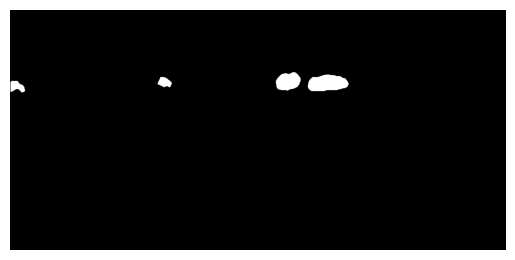

/tmp/ipykernel_1153057/1589478124.py:17: UserWarning: mask.tif is a low contrast image
  io.imsave('mask.tif', mask_uint8)


In [ ]:

# read npy file
import numpy as np
import os


mask = np.load("0_00.npy")
from skimage import io
# Assuming 'mask' is your numpy array loaded from the .npy file
plt.imshow(mask, cmap='gray')  # 'gray' colormap maps 0 to black and 1 to white
plt.axis('off')  # To turn off the axis which is not needed here
plt.show()

# Convert the mask to uint8 format with scaling
mask_uint8 = (mask * 255).astype(np.uint8)

# Save the mask as a .tif image
io.imsave('mask.tif', mask_uint8)



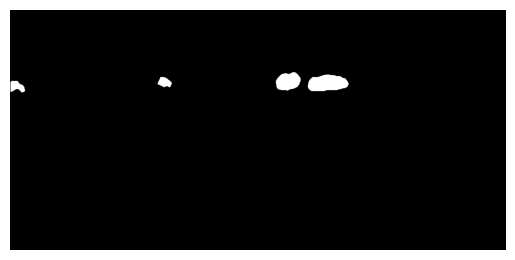

In [ ]:
#read from tif file
import numpy as np
import os

from skimage import io

mask = io.imread("mask.tif")
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()
